In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np


In [2]:
final_data = pd.read_csv('final_merged_data.csv')

In [3]:
#cleaning data
final_data = final_data.dropna()
final_data.head()

,Unnamed: 0,Zip Code,Total GF Rest,Total Number GF $,Total Number GF $$,Total Number GF $$$,Total Number GF $$$$,"Num of Households with income $200,000 or more",Median family income,"Percent of households with income over $200,000",ALL Total
0,0,90006,26,7,15,2,0,155.0,32273.0,0.795933,217
1,1,90028,135,37,77,16,1,399.0,45905.0,2.462811,287
2,2,90032,7,3,4,0,0,268.0,45433.0,1.998658,67
3,3,90033,7,2,5,0,0,102.0,31595.0,0.774487,140
4,4,90035,43,5,35,1,0,1922.0,98792.0,14.627093,107


In [4]:
#calculating percentage of total restaurants that are gluten free
final_data["Percent of Total Restaurants"] = final_data["Total GF Rest"]/final_data["ALL Total"]*100

In [5]:
final_data.head()

,Unnamed: 0,Zip Code,Total GF Rest,Total Number GF $,Total Number GF $$,Total Number GF $$$,Total Number GF $$$$,"Num of Households with income $200,000 or more",Median family income,"Percent of households with income over $200,000",ALL Total,Percent of Total Restaurants
0,0,90006,26,7,15,2,0,155.0,32273.0,0.795933,217,11.981567
1,1,90028,135,37,77,16,1,399.0,45905.0,2.462811,287,47.038328
2,2,90032,7,3,4,0,0,268.0,45433.0,1.998658,67,10.447761
3,3,90033,7,2,5,0,0,102.0,31595.0,0.774487,140,5.000000
4,4,90035,43,5,35,1,0,1922.0,98792.0,14.627093,107,40.186916


In [11]:
#getting rid of "bad" data... Gf restaurants cannot account for more than the total number of restaurants
final_data = final_data.loc[final_data["Percent of Total Restaurants"]<=100]
print(final_data.shape)

(77, 12)


r-squared: 0.337598


Text(0, 0.5, 'Percentage of GF Restaurants')

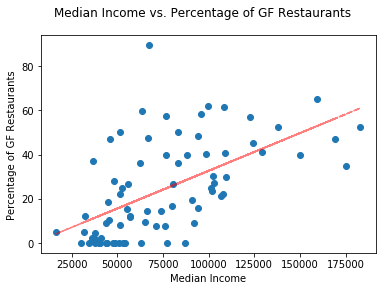

In [8]:
x_axis = final_data["Median family income"]
y = final_data['Percent of Total Restaurants']



(slope, intercept, r_value, p_value, std_err) = linregress(x_axis, y)
print("r-squared: %f" % r_value**2)

fit = slope * x_axis + intercept

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y)
fit = slope * x_axis + intercept
# Plot data
fig, ax = plt.subplots()

ax.plot(x_axis, y, linewidth=0, marker='o')
ax.plot(x_axis, fit,alpha = 0.5,linestyle = '--', color="red")

fig.suptitle("Median Income vs. Percentage of GF Restaurants")
ax.set_xlabel("Median Income")
ax.set_ylabel("Percentage of GF Restaurants")


r-squared: 0.290926


Text(0, 0.5, 'Percentage of GF Restaurants')

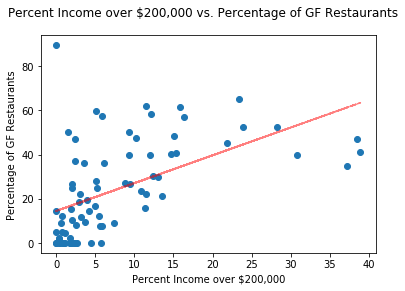

In [10]:
x_axis = final_data["Percent of households with income over $200,000"]
y = final_data['Percent of Total Restaurants']



(slope, intercept, r_value, p_value, std_err) = linregress(x_axis, y)
print("r-squared: %f" % r_value**2)

fit = slope * x_axis + intercept

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y)
fit = slope * x_axis + intercept
# Plot data
fig, ax = plt.subplots()

ax.plot(x_axis, y, linewidth=0, marker='o')
ax.plot(x_axis, fit,alpha = 0.5,linestyle = '--', color="red")

fig.suptitle("Percent Income over $200,000 vs. Percentage of GF Restaurants")
ax.set_xlabel("Percent Income over $200,000")
ax.set_ylabel("Percentage of GF Restaurants")